**Dataset URL:** https://drive.google.com/file/d/1ns0PePYmioq6AJDGWb2VuW6VU0SCklO2/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Covid_19_Clean_Complete (2).csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


**Province/State:** The specific state or province within a country.

**Country/Region:** The name of the country where COVID-19 cases were reported.

**Lat:** Latitude of the country.

**Long:** Longitude of the country.

**Date:** Date on which the data was recorded.

**Confirmed:** The number of confirmed COVID-19 cases.

**Deaths:** The number of people who dies due to COVID-19.

**Recovered:** The number of people who recovered from COVID-19.

**Active:** Current active cases till that date.

**WHO REGION:** The WHO area that covers the specific country.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Use rename fxn and rename the Province/State column as State
# and Country/Region as Country

# Also get the count of all the dates in date column.
# Also find the min and max date.

df.rename(columns={
    'Province/State' : 'State',
    'Country/Region' : 'Country'
},inplace=True)

In [ ]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
df['Date'].min()

'2020-01-22'

In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
# Select all the confirmed cases with respect to date and store it in a new dataframe
# Create a line plot for this new data frame
# In x store  Dates
# In y store Confirmed Cases

confirmed_cases = df.groupby(['Date'])['Confirmed'].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


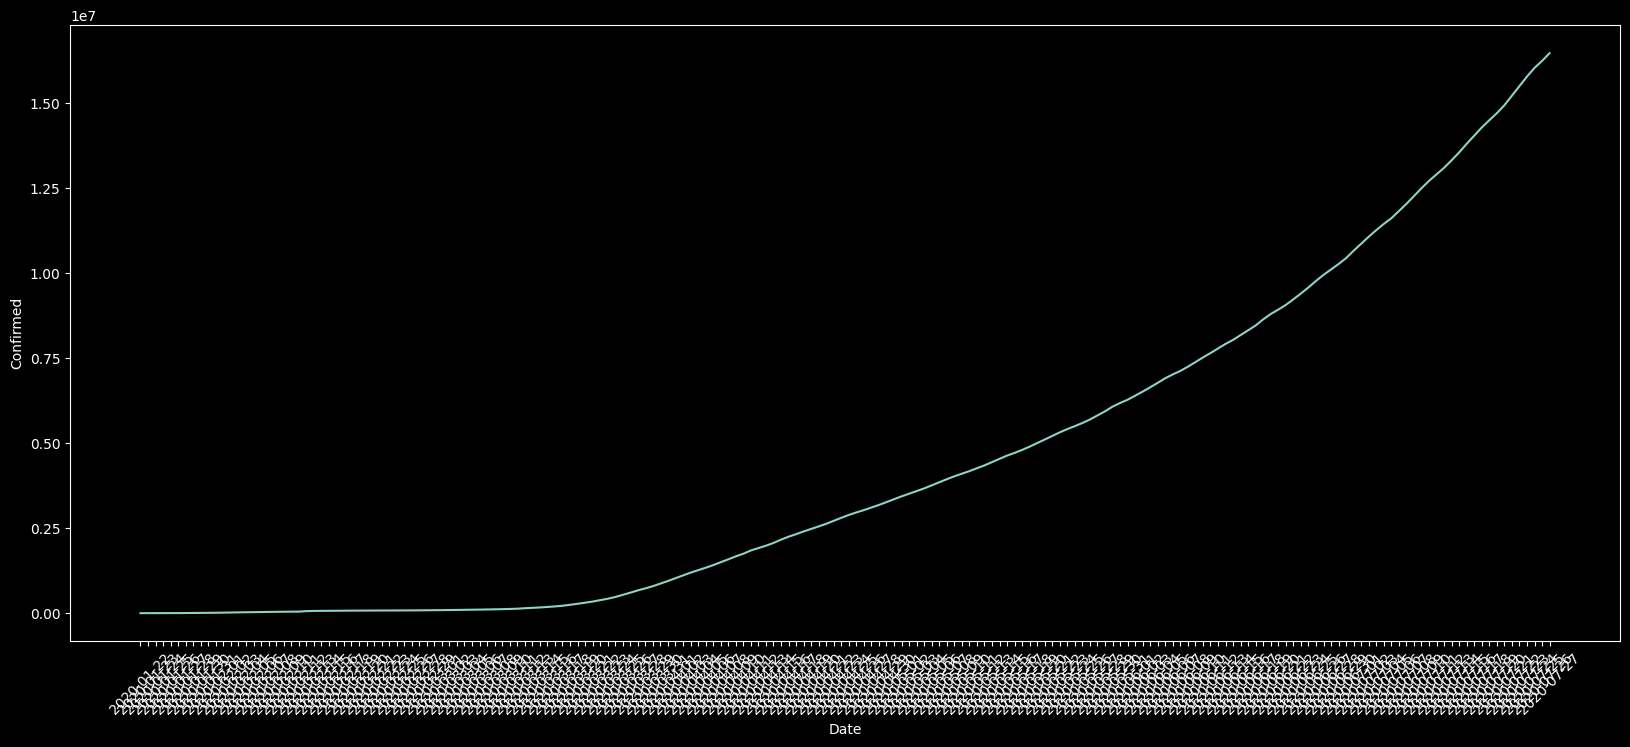

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=confirmed_cases,x='Date',y='Confirmed')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Deaths	Recovered	Active
# Plot the data for above 3 columns
# First create a dataframe and then plot the graph.


In [ ]:
new_df = df.groupby(['Date'])[['Deaths','Recovered','Active']].sum().reset_index()
new_df

,Date,Deaths,Recovered,Active
0,2020-01-22,17,28,510
1,2020-01-23,18,30,606
2,2020-01-24,26,36,879
3,2020-01-25,42,39,1353
4,2020-01-26,56,52,2010
...,...,...,...,...
183,2020-07-23,633506,8710969,6166006
184,2020-07-24,639650,8939705,6212290
185,2020-07-25,644517,9158743,6243930
186,2020-07-26,648621,9293464,6309711


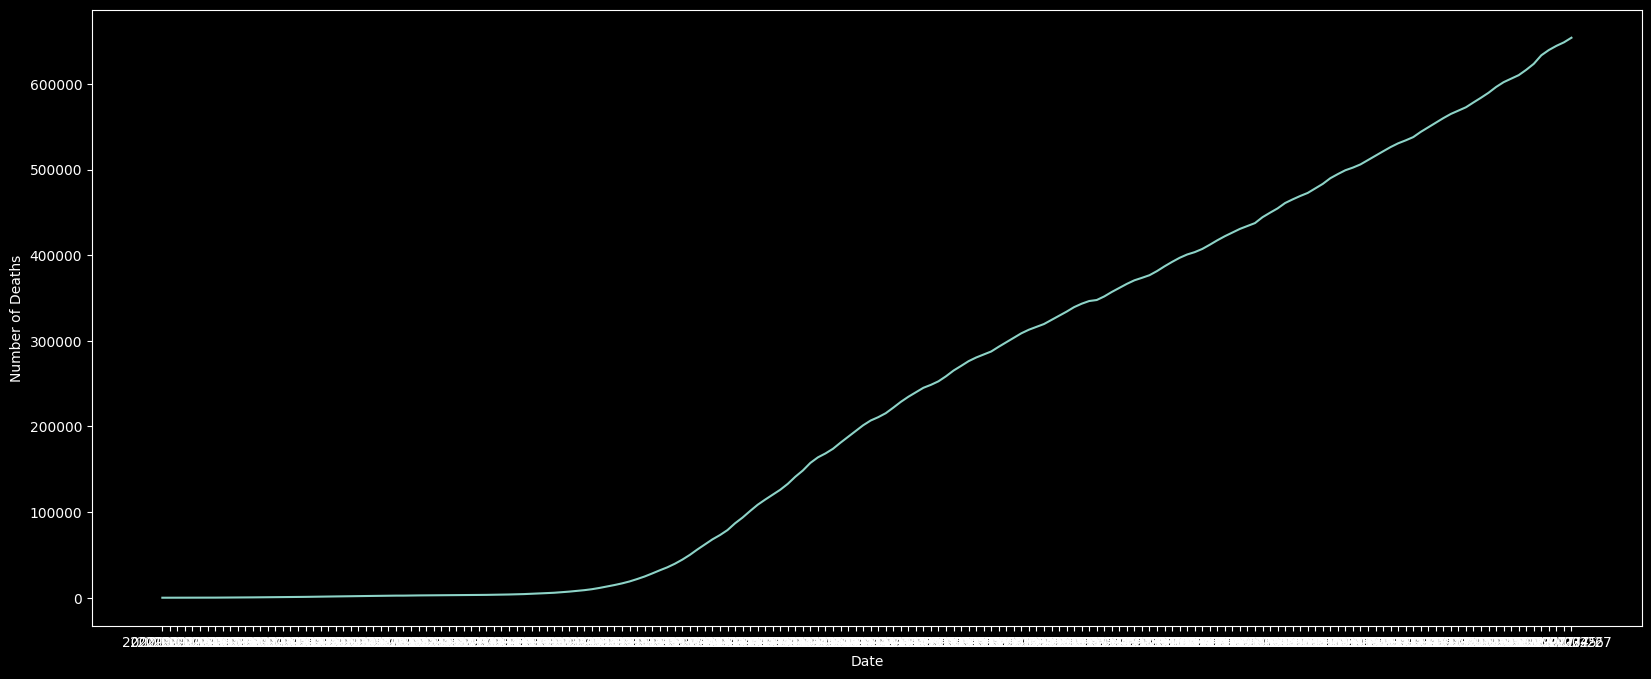

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=new_df,x='Date',y='Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

In [ ]:
# Randomly Selecting 3 countries:
# India
# US
# China
# Create 3 new data frame for all these countries.
# And then select confirmed cases, active cases, deaths, recorved with respect to date.


In [ ]:
country_US = df[df['Country']=='US']
country_US

country_INDIA = df[df['Country']=='India']

country_CHINA = df[df['Country']=='China']

In [ ]:
country_US  = country_US.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
country_INDIA  = country_INDIA.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
country_CHINA  = country_CHINA.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [ ]:
country_INDIA

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


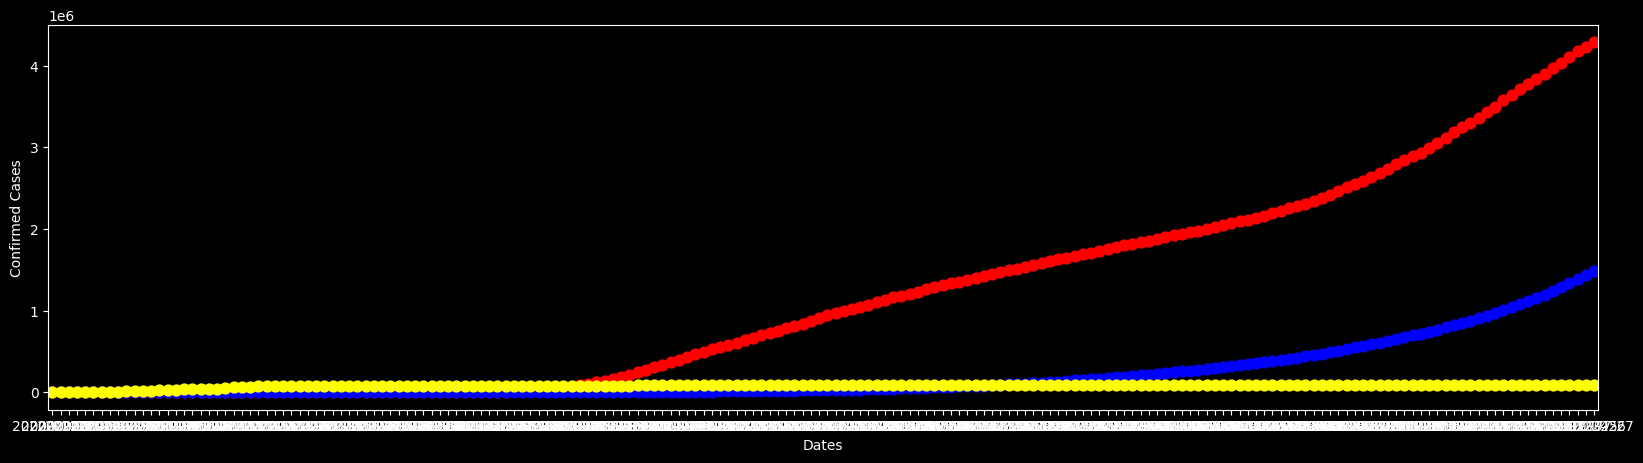

In [ ]:
plt.figure(figsize=(20,5))

sns.pointplot(data=country_US,x='Date',y='Confirmed',color='Red')
sns.pointplot(data=country_INDIA,x='Date',y='Confirmed',color='Blue')
sns.pointplot(data=country_CHINA,x='Date',y='Confirmed',color='Yellow')

plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.show()

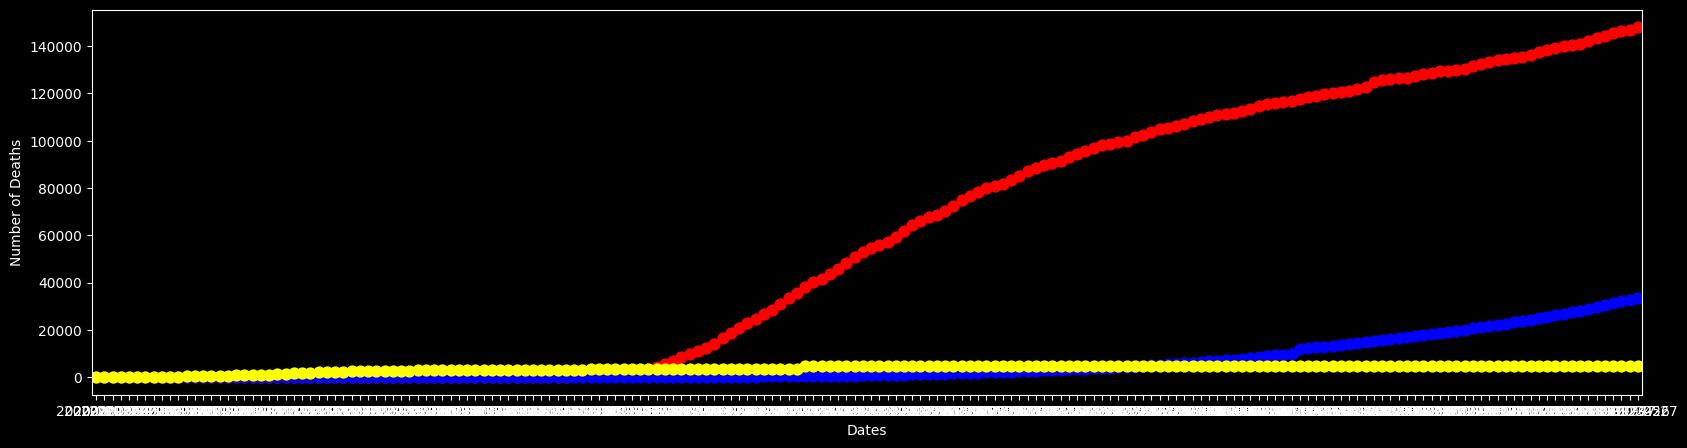

In [ ]:
# Create the plot for number of people died during covid 19 from these 3 countries (US, India, CHINA)
plt.figure(figsize=(20,5))

sns.pointplot(data=country_US,x='Date',y='Deaths',color='Red')
sns.pointplot(data=country_INDIA,x='Date',y='Deaths',color='Blue')
sns.pointplot(data=country_CHINA,x='Date',y='Deaths',color='Yellow')

plt.xlabel('Dates')
plt.ylabel('Number of Deaths')
plt.show()

# **Model Building**

In [ ]:
'''
Facebook Prophet is a time series forecasting tool developed via Facebook that's designed to be easy
to use and effective for a wide range of time series data. It's particularly useful for data that has strong
seasonal effects (like daily or weekly patterns) and includs important dates or events that can impact the forecast.
'''

"\nFacebook Prophet is a time series forecasting tool developed via Facebook that's designed to be easy \nto use and effective for a wide range of time series data. It's particularly useful for data that has strong\nseasonal effects (like daily or weekly patterns) and includs important dates or events that can impact the forecast.\n"

In [ ]:
# y(t) = g(t) + s(t) + h(t) + Et

# g(t) = Trend
# s(t) = Seasonality
# h(t) = Holiday/Events
# E(t) = Error term

In [ ]:
# !pip install prophet  If using jupyter notebook uncomment it and run it.

In [ ]:
from prophet import Prophet
# It takes two columns
# ds: date
# y: Target variable

In [ ]:
# The column names must be ds and y (It's mandatory)
confirmed_cases.columns = ['ds','y']

In [ ]:
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model = Prophet()

In [ ]:
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgienct9/guefztos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgienct9/ctxbptpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39655', 'data', 'file=/tmp/tmpkgienct9/guefztos.json', 'init=/tmp/tmpkgienct9/ctxbptpk.json', 'output', 'file=/tmp/tmpkgienct9/prophet_modelusy0fokl/prophet_model-20250724030855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_pred = model.make_future_dataframe(periods=7) # Passing weekly data. (period=7)
forecasted = model.predict(future_pred)
forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.207359e+05,8.338315e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.157395e+05,9.457155e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.410451e+04,1.170658e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.928716e+04,1.122584e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.763312e+04,1.159926e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663712e+07,1.685762e+07,1.673976e+07,1.675107e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685269e+07,1.707553e+07,1.693723e+07,1.696133e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705441e+07,1.727964e+07,1.713307e+07,1.717263e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.723665e+07,1.748042e+07,1.732838e+07,1.738597e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:

# ds:
# This column contains the dates for which prediction have been made. It stands for "date stamp".

# yhat:
# This contains all the predicted values (forecast) for the given data in ds column.
# It reprents model's best estimate for that point in time.

# yhat_upper:
# This column represents the upper bound of the predicted values, which indicates the higher end of the
# confidence intervel.
# It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainity.

# yhat_lower:
# This column represents the lower bound of predicted value.
# It suggests that the actual values is unlikely to be lower than this amount.


# yhat = 250
# yhat_upper = 265
# yhat_lower = 230


In [ ]:
forecasted[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.207359e+05,-2.067684e+04,8.338315e+04
1,-1.157395e+05,-8.050948e+03,9.457155e+04
2,-9.410451e+04,5.827455e+03,1.170658e+05
3,-9.928716e+04,1.217668e+04,1.122584e+05
4,-9.763312e+04,8.405020e+03,1.159926e+05
...,...,...,...
190,1.663712e+07,1.674391e+07,1.685762e+07
191,1.685269e+07,1.695910e+07,1.707553e+07
192,1.705441e+07,1.716676e+07,1.727964e+07
193,1.723665e+07,1.736430e+07,1.748042e+07


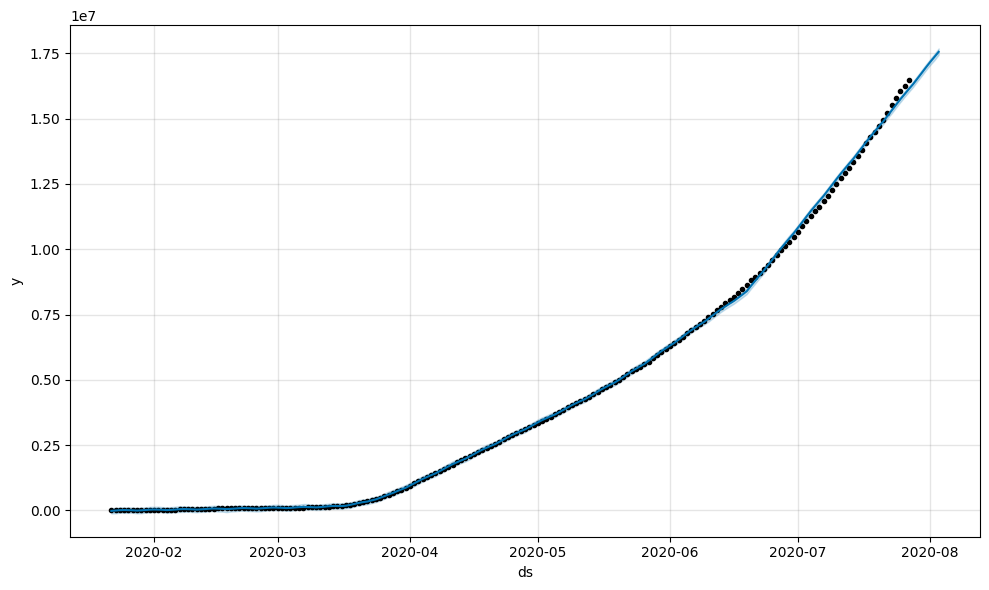

In [ ]:
with plt.style.context('default'):
    model.plot(forecasted)
    plt.show()

In [ ]:
# Homework:
# Forecasting for number of people died during covid-19

In [ ]:
import plotly

In [ ]:
import plotly.express as px

In [ ]:
world = df.groupby(['Country'])[['Confirmed','Deaths','Active','Recovered']].sum().reset_index()
world

,Country,Confirmed,Deaths,Active,Recovered
0,Afghanistan,1936390,49098,1089052,798240
1,Albania,196702,5708,72117,118877
2,Algeria,1179755,77972,345886,755897
3,Andorra,94404,5423,19907,69074
4,Angola,22662,1078,15011,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,170967,61124
183,Western Sahara,901,63,190,648
184,Yemen,67180,17707,25694,23779
185,Zambia,129421,2643,43167,83611


In [ ]:
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Deaths',hover_name='Country',range_color=[15000,100000])
figure.show()